In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = np.linspace(-2,2,300)
f = lambda x: (x+1)*(x-1)*(x-2)
y = f(x) + 3*np.random.rand(300)

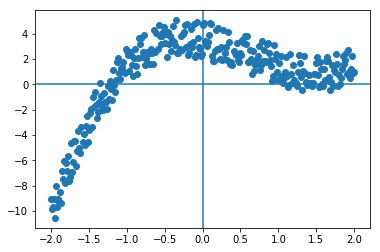

In [3]:
plt.scatter(x, y)
plt.axvline()
plt.axhline()

## OLS via Linear Algebra

Remember, this function yields a $\beta$ vector.

In [5]:
inv = np.linalg.inv

def solve_me(X, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

We might guess that we could fit this plot with a linear model.

$$\widehat{f} = \beta_0 + \beta_1x$$

In [8]:
ones = np.ones_like(x)
X = np.array([ones, x]).T
X.shape

(300, 2)

In [10]:
X_df = pd.DataFrame(X)

In [12]:
X_df.head()

,0,1
0,1.0,-2.000000
1,1.0,-1.986622
2,1.0,-1.973244
3,1.0,-1.959866
4,1.0,-1.946488


In [14]:
beta = solve_me(X, y)
fhat = lambda x: beta[0] + beta[1]*x
yhat = fhat(x)

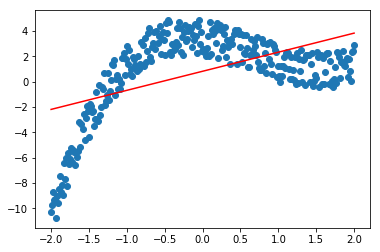

In [15]:
plt.scatter(x, y)
plt.plot(x, yhat, c='red')

##### Not So Good

## Consider a polynomial expansion

Guess

$$\widehat{f} = \beta_0 + \beta_1x + \beta_2x^2$$

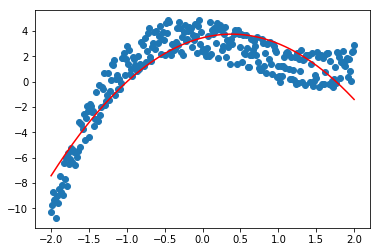

In [16]:
ones = np.ones_like(x)
X = np.array([ones, x, x**2]).T
beta = solve_me(X, y)
fhat = lambda x: beta[0] + beta[1]*x + beta[2]*x**2
yhat = fhat(x)
plt.scatter(x, y)
plt.plot(x, yhat, c='red')

##### Better

## Consider a greater polynomial expansion

$$\widehat{f} = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$$

In [20]:
ones = np.ones_like(x)
X = np.array([ones, x, x**2, x**3]).T
beta = solve_me(X, y)
fhat = lambda x: beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3
yhat = fhat(x)

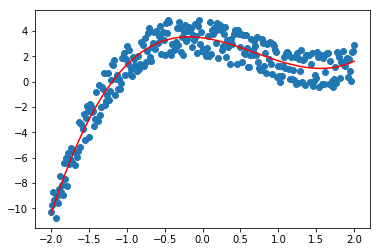

In [21]:
plt.scatter(x, y)
plt.plot(x, yhat, c='red')

# Multi-variate Polynomial Expansion

In [22]:
from sklearn.datasets import make_circles

In [23]:
X, y = make_circles()
X = pd.DataFrame(X)

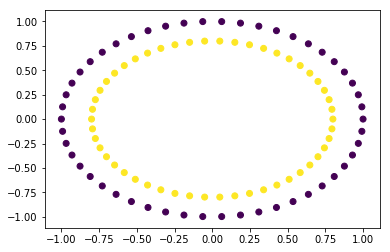

In [24]:
plt.scatter(X[0], X[1], c=y)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
clf_1 = SVC(kernel='linear')
clf_2 = LogisticRegression()

In [27]:
clf_1.fit(X, y)
clf_2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

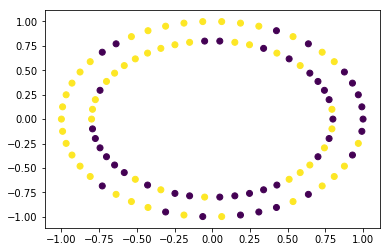

In [28]:
plt.scatter(X[0], X[1], c=clf_1.predict(X))

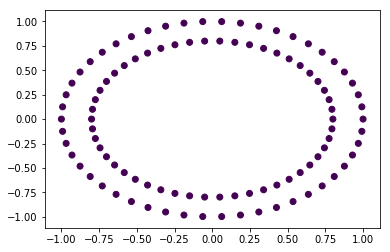

In [29]:
plt.scatter(X[0], X[1], c=clf_2.predict(X))

In [30]:
X_poly = X.copy()
X_poly[2] = X[0]**2
X_poly[3] = X[1]**2
X_poly[4] = X[0]*X[1]

In [31]:
clf_1.fit(X_poly, y)
clf_2.fit(X_poly, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

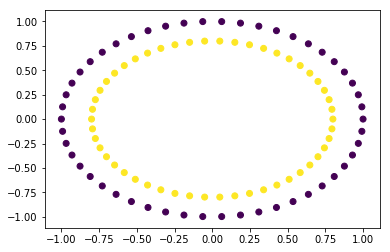

In [32]:
plt.scatter(X[0], X[1], c=clf_1.predict(X_poly))

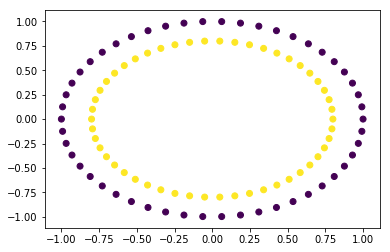

In [33]:
plt.scatter(X[0], X[1], c=clf_2.predict(X_poly))